In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [626]:
def custom_describe(df):
    summary = df.describe(percentiles=[0.01,0.1,0.2,0.5,0.9,0.99]).T
    missing_values = df.isna().sum().T
    missing_stats = pd.DataFrame({
        'missing_values': missing_values,
        'percent_missing': (missing_values / len(df)) * 100
    })
    return pd.concat([summary, missing_stats], axis=1)

In [627]:
def row_col_count(df):
    print(f"number of rows: {df.shape[0]}, column: {df.shape[1]}")

In [642]:
def print_df_null_stats(name, df):
    print(f"dataframe                          : {name}")
    print(f"Duplicates                         : {df.duplicated().sum()}")
    print(f"Total Missing Values               : {df.isna().sum().sum()}")
    print(f"Number of rows with missing values : {df.isna().any(axis=1).sum()}")

In [645]:
def null_col_check(name, df):
    print(f"Dataframe: {name}")
    null_counts = df.isnull().sum()

    # Now, filter the null_counts Series to get only the columns with non-zero counts
    columns_with_null = null_counts[null_counts > 0]
    print(columns_with_null)

# 1. Data Read

In [634]:
df = pd.read_csv('data/car_insurance_claim.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [650]:
colExplanation=[ "Unique identifier for each customer.", "Number of kids the customer has who are of driving age.", "Date of birth of the customer.", "Age of the customer.", 
                "Number of kids the customer has at home.", "Years on the job (number of years the customer has been employed).", "Income of the customer.",
                "Indicates whether the customer is a single parent (Yes/No).", "Value of the customer's home.", "Marital status of the customer (Yes/No).",
                "Gender of the customer (M/F).", "Education level of the customer.", "Occupation of the customer.", "Daily travel time to work.",
                "Purpose of car usage (Private/Commercial).", "Value of the customer's car.", "Time in force (Years).",  "Type of car.", 
                "Indicates whether the customer owns a red car (yes/no).", "Total amount of previous claims.", "Number of claims reported.", 
                "Indicates whether the customer's driver's license has been revoked (Yes/No).", "Number of motor vehicle record points.", "Possible future claims",
                "Age of the customer's car.", "Indicates whether a claim was filed (1/0).", " Urbanicity type ((Highly Urban/Urban)/(Highly Rural/Rural))."
]
colExplanationDf = pd.DataFrame({
    'Variables': df.columns,
    'Explanation': colExplanation
})
colExplanationDf.style.background_gradient()

,Variables,Explanation
0,ID,Unique identifier for each customer.
1,KIDSDRIV,Number of kids the customer has who are of driving age.
2,BIRTH,Date of birth of the customer.
3,AGE,Age of the customer.
4,HOMEKIDS,Number of kids the customer has at home.
5,YOJ,Years on the job (number of years the customer has been employed).
6,INCOME,Income of the customer.
7,PARENT1,Indicates whether the customer is a single parent (Yes/No).
8,HOME_VAL,Value of the customer's home.
9,MSTATUS,Marital status of the customer (Yes/No).


# 2. Data Analysis

In [635]:
row_col_count(df)

number of rows: 10302, column: 27


In [636]:
print(f"distinct data type in the data: {list(set(df.dtypes.tolist()))}")

distinct data type in the data: [dtype('int64'), dtype('float64'), dtype('O')]


In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [638]:
custom_describe(df)

,count,mean,std,min,1%,10%,20%,50%,90%,99%,max,missing_values,percent_missing
ID,10302.0,4.956631e+08,2.864675e+08,63175.0,10932459.54,99669687.3,196544770.0,497004293.0,893989604.9,988703393.0,999926368.0,0,0.000000
KIDSDRIV,10302.0,1.692875e-01,5.065116e-01,0.0,0.00,0.0,0.0,0.0,1.0,2.0,4.0,0,0.000000
AGE,10295.0,4.483740e+01,8.606445e+00,16.0,25.00,34.0,38.0,45.0,56.0,64.0,81.0,7,0.067948
HOMEKIDS,10302.0,7.204426e-01,1.116323e+00,0.0,0.00,0.0,0.0,0.0,3.0,4.0,5.0,0,0.000000
YOJ,9754.0,1.047406e+01,4.108943e+00,0.0,0.00,5.0,8.0,11.0,15.0,17.0,23.0,548,5.319355
TRAVTIME,10302.0,3.341642e+01,1.586969e+01,5.0,5.00,13.0,20.0,33.0,54.0,75.0,142.0,0,0.000000
TIF,10302.0,5.329159e+00,4.110795e+00,1.0,1.00,1.0,1.0,4.0,11.0,17.0,25.0,0,0.000000
CLM_FREQ,10302.0,8.007183e-01,1.154079e+00,0.0,0.00,0.0,0.0,0.0,3.0,4.0,5.0,0,0.000000
MVR_PTS,10302.0,1.710153e+00,2.159015e+00,0.0,0.00,0.0,0.0,1.0,5.0,8.0,13.0,0,0.000000
CAR_AGE,9663.0,8.298148e+00,5.714450e+00,-3.0,1.00,1.0,1.0,8.0,16.0,21.0,28.0,639,6.202679


In [643]:
print_df_null_stats('df', df)

dataframe                          : df
Duplicates                         : 1
Total Missing Values               : 3004
Number of rows with missing values : 2645


In [646]:
null_col_check('df', df)

Dataframe: df
AGE             7
YOJ           548
INCOME        570
HOME_VAL      575
OCCUPATION    665
CAR_AGE       639
dtype: int64


In [647]:
# number of unique values
s_unique_values = df.nunique()
s_unique_values

ID            8753
KIDSDRIV         5
BIRTH         6560
AGE             61
HOMEKIDS         6
YOJ             21
INCOME        8151
PARENT1          2
HOME_VAL      6334
MSTATUS          2
GENDER           2
EDUCATION        5
OCCUPATION       8
TRAVTIME       100
CAR_USE          2
BLUEBOOK      2985
TIF             23
CAR_TYPE         6
RED_CAR          2
OLDCLAIM      3545
CLM_FREQ         6
REVOKED          2
MVR_PTS         14
CLM_AMT       2346
CAR_AGE         30
CLAIM_FLAG       2
URBANICITY       2
dtype: int64

In [648]:
column_with_25_unique_values = s_unique_values[s_unique_values <25].index.to_list()

In [649]:
for c in column_with_25_unique_values:
    print(f"{c}: {s_unique_values[c]} \n {df[c].unique().tolist()}\n\n")

KIDSDRIV: 5 
 [0, 1, 2, 3, 4]


HOMEKIDS: 6 
 [0, 1, 2, 3, 4, 5]


YOJ: 21 
 [11.0, 10.0, 14.0, nan, 12.0, 7.0, 5.0, 0.0, 13.0, 9.0, 17.0, 8.0, 15.0, 16.0, 6.0, 18.0, 23.0, 4.0, 3.0, 2.0, 19.0, 1.0]


PARENT1: 2 
 ['No', 'Yes']


MSTATUS: 2 
 ['z_No', 'Yes']


GENDER: 2 
 ['M', 'z_F']


EDUCATION: 5 
 ['PhD', 'z_High School', 'Bachelors', '<High School', 'Masters']


OCCUPATION: 8 
 ['Professional', 'z_Blue Collar', 'Manager', 'Clerical', 'Doctor', 'Lawyer', nan, 'Home Maker', 'Student']


CAR_USE: 2 
 ['Private', 'Commercial']


TIF: 23 
 [11, 1, 4, 7, 6, 10, 9, 17, 18, 13, 5, 3, 16, 12, 8, 14, 20, 22, 21, 2, 15, 19, 25]


CAR_TYPE: 6 
 ['Minivan', 'Van', 'z_SUV', 'Sports Car', 'Panel Truck', 'Pickup']


RED_CAR: 2 
 ['yes', 'no']


CLM_FREQ: 6 
 [2, 0, 1, 3, 5, 4]


REVOKED: 2 
 ['No', 'Yes']


MVR_PTS: 14 
 [3, 0, 2, 10, 1, 4, 5, 13, 8, 6, 7, 9, 11, 12]


CLAIM_FLAG: 2 
 [0, 1]


URBANICITY: 2 
 ['Highly Urban/ Urban', 'z_Highly Rural/ Rural']




# 3. Data Cleanup

In [651]:
df_clean = df.copy()

# drop the duplicate rows
df_clean.drop_duplicates(inplace=True)
row_col_count(df_clean)

number of rows: 10301, column: 27


In [652]:
# clean up the data for some of the column to make more readable and manageable
# convert currency column as flot
# some of the column have prefix z_, remove the prefix
# drop the ID column as specific to each row and BIRTH as there is AGE column

currency_cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
z_cols = ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE','URBANICITY']

for col in currency_cols:
    df_clean[col] = (df_clean[col].astype('str').map(lambda x: x.replace('$','').replace(',',''))).astype('float')
    
for col in z_cols:
    df_clean[col] = df_clean[col].astype('str').map(lambda x: x.replace('z_',''))
    

df_clean.rename({'CLM_AMT': 'T_CLAIM_AMT', 'CLAIM_FLAG': 'T_CLAIM_FLAG'}, axis=1, inplace=True);
df_clean.drop(['BIRTH','ID'], axis=1, inplace=True);
df_clean.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,T_CLAIM_AMT,CAR_AGE,T_CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


In [653]:
row_col_count(df_clean)

df_clean.info()

number of rows: 10301, column: 25
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KIDSDRIV      10301 non-null  int64  
 1   AGE           10294 non-null  float64
 2   HOMEKIDS      10301 non-null  int64  
 3   YOJ           9753 non-null   float64
 4   INCOME        9731 non-null   float64
 5   PARENT1       10301 non-null  object 
 6   HOME_VAL      9726 non-null   float64
 7   MSTATUS       10301 non-null  object 
 8   GENDER        10301 non-null  object 
 9   EDUCATION     10301 non-null  object 
 10  OCCUPATION    10301 non-null  object 
 11  TRAVTIME      10301 non-null  int64  
 12  CAR_USE       10301 non-null  object 
 13  BLUEBOOK      10301 non-null  float64
 14  TIF           10301 non-null  int64  
 15  CAR_TYPE      10301 non-null  object 
 16  RED_CAR       10301 non-null  object 
 17  OLDCLAIM      10301 non-null  float

In [480]:
# identify the numrical and category columns froom the dataset
category_cols = df_clean.select_dtypes(include = ['O']).columns.to_list()
numerical_cols = df_clean.select_dtypes(include = ['int64','float64']).columns.to_list()

print(f"category_cols: {len(category_cols)}\n {category_cols}\n\n")
print(f"numerical_cols: {len(numerical_cols)}\n {numerical_cols}\n\n")

category_cols: 10
 ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']


numerical_cols: 15
 ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'T_CLAIM_AMT', 'CAR_AGE', 'T_CLAIM_FLAG']




>Check if claim flag and amount has proper relationship i.e when flag is false then amount should not be > 0 and vice-versa

In [654]:
df_clean.loc[(df_clean['T_CLAIM_FLAG'] == False) & (df_clean['T_CLAIM_AMT'] > 0), ['T_CLAIM_FLAG','T_CLAIM_AMT']]

,T_CLAIM_FLAG,T_CLAIM_AMT


In [655]:
df_clean.loc[(df_clean['T_CLAIM_FLAG'] == True) & (df_clean['T_CLAIM_AMT'] <= 0), ['T_CLAIM_FLAG','T_CLAIM_AMT']]

,T_CLAIM_FLAG,T_CLAIM_AMT


# 4. Data Pre-processing

In [656]:
df_pp = df_clean.copy()

array([[<Axes: title={'center': 'KIDSDRIV'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'HOMEKIDS'}>,
        <Axes: title={'center': 'YOJ'}>],
       [<Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'HOME_VAL'}>,
        <Axes: title={'center': 'TRAVTIME'}>,
        <Axes: title={'center': 'BLUEBOOK'}>],
       [<Axes: title={'center': 'TIF'}>,
        <Axes: title={'center': 'OLDCLAIM'}>,
        <Axes: title={'center': 'CLM_FREQ'}>,
        <Axes: title={'center': 'MVR_PTS'}>],
       [<Axes: title={'center': 'T_CLAIM_AMT'}>,
        <Axes: title={'center': 'CAR_AGE'}>,
        <Axes: title={'center': 'T_CLAIM_FLAG'}>, <Axes: >]], dtype=object)

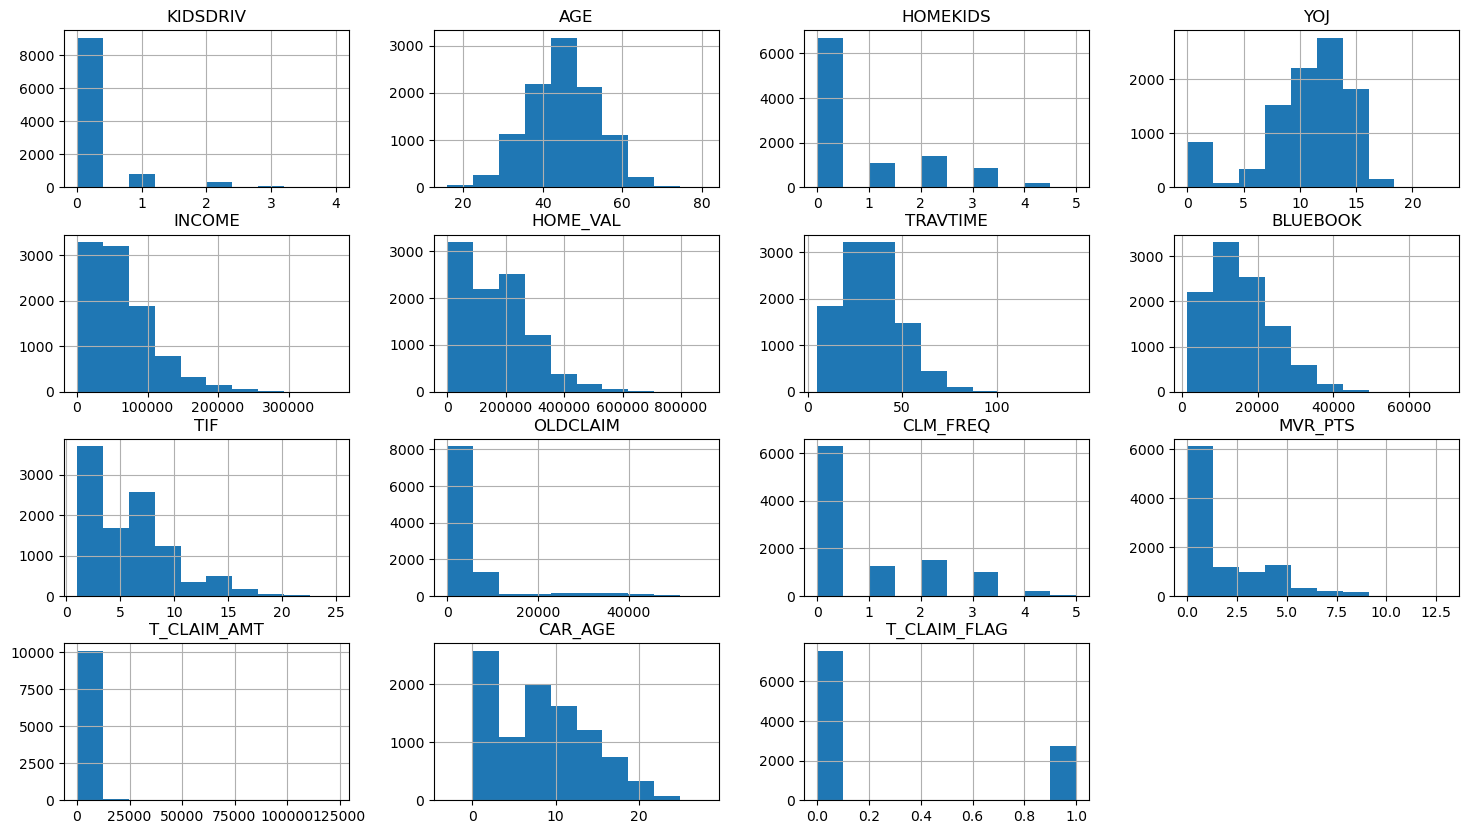

In [657]:
df_pp.hist(numerical_cols, figsize=(18,10))

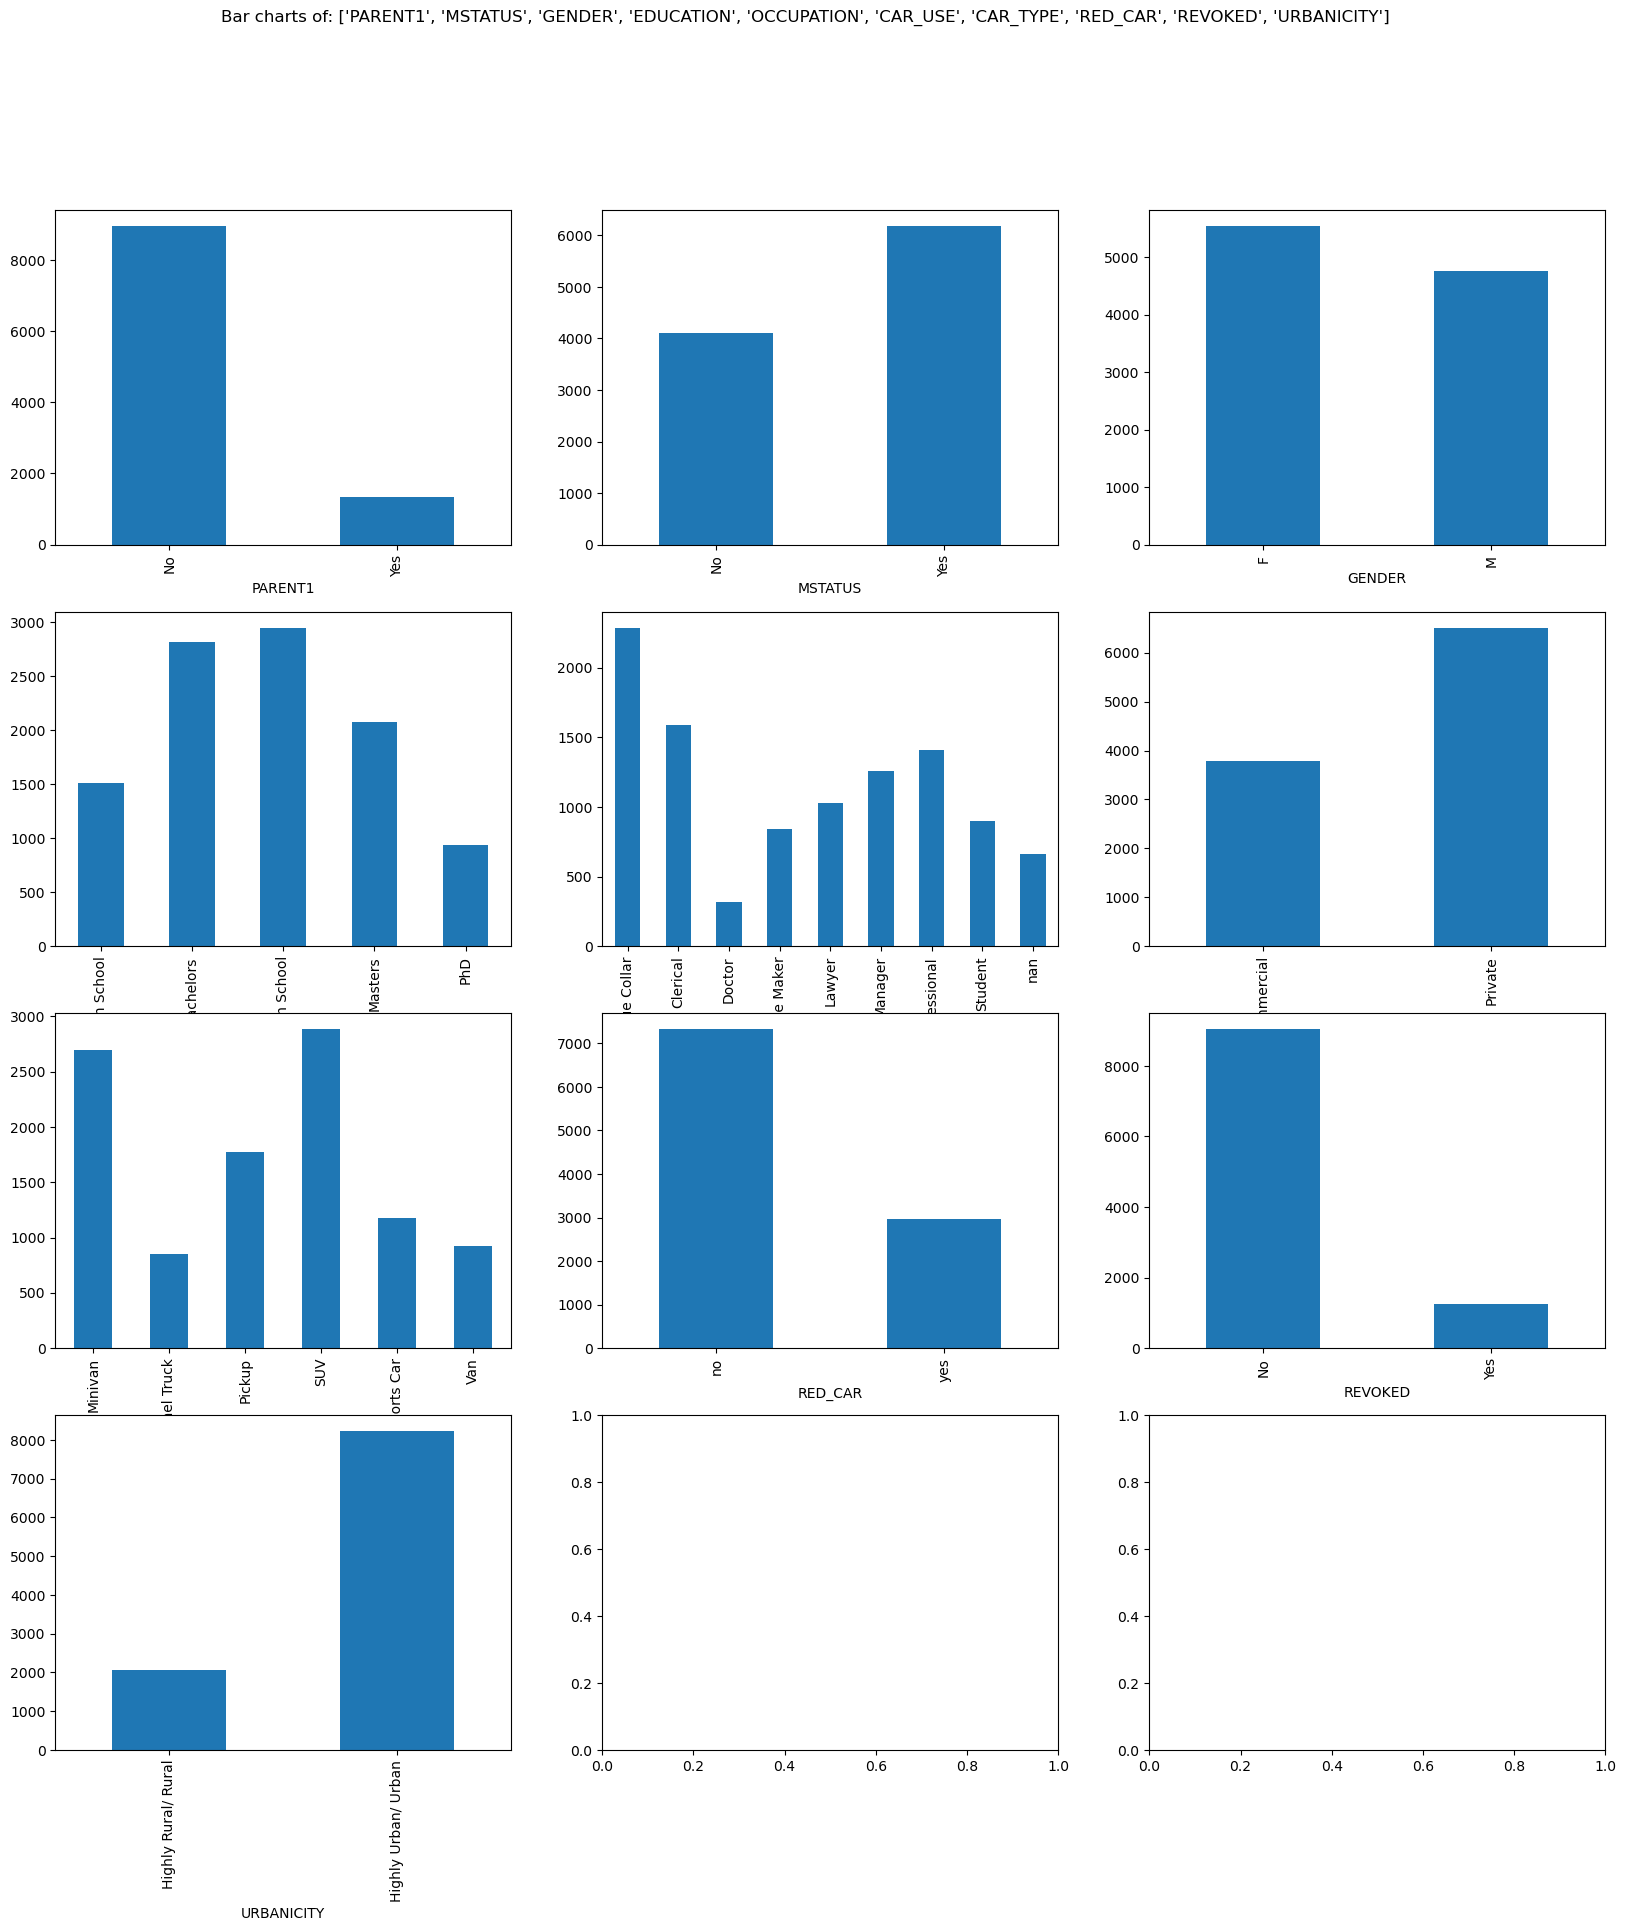

In [658]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    num_cols = len(colsToPlot)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    
    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=num_rows, ncols=min(num_cols, 3), figsize=(20, 5 * num_rows))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    if num_cols == 1:  # If there's only one column to plot, subPlot will not be an array
        inpData.groupby(colsToPlot[0]).size().plot(kind='bar', ax=subPlot)
    else:
        for i, colName in enumerate(colsToPlot):
            row_num = i // 3  # Calculate the current row number
            col_num = i % 3   # Calculate the current column number
            inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[row_num, col_num])

PlotBarCharts(inpData=df_pp, colsToPlot=category_cols)

In [661]:
# checking the skewness of the data
from scipy.stats import skew

for col in numerical_cols:
    print(f"{col.ljust(13)} : {skew(df_pp[col])}")

KIDSDRIV      : 3.342179225634607
AGE           : nan
HOMEKIDS      : 1.3363373427401666
YOJ           : nan
INCOME        : nan
HOME_VAL      : nan
TRAVTIME      : 0.4353685607421527
BLUEBOOK      : 0.7692000925639272
TIF           : 0.899192587129173
OLDCLAIM      : 3.119121414258397
CLM_FREQ      : 1.1937446397767575
MVR_PTS       : 1.3401860950635005
T_CLAIM_AMT   : 9.294697683315432
CAR_AGE       : nan
T_CLAIM_FLAG  : 1.0558136593455558


>There is some skewness in the data, could mean there are outliners. 

/var/folders/bj/yxk4ypnj25l5q7kvnwj_j2mw0000gn/T/ipykernel_2114/3685308900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_pp.corr()


<Axes: >

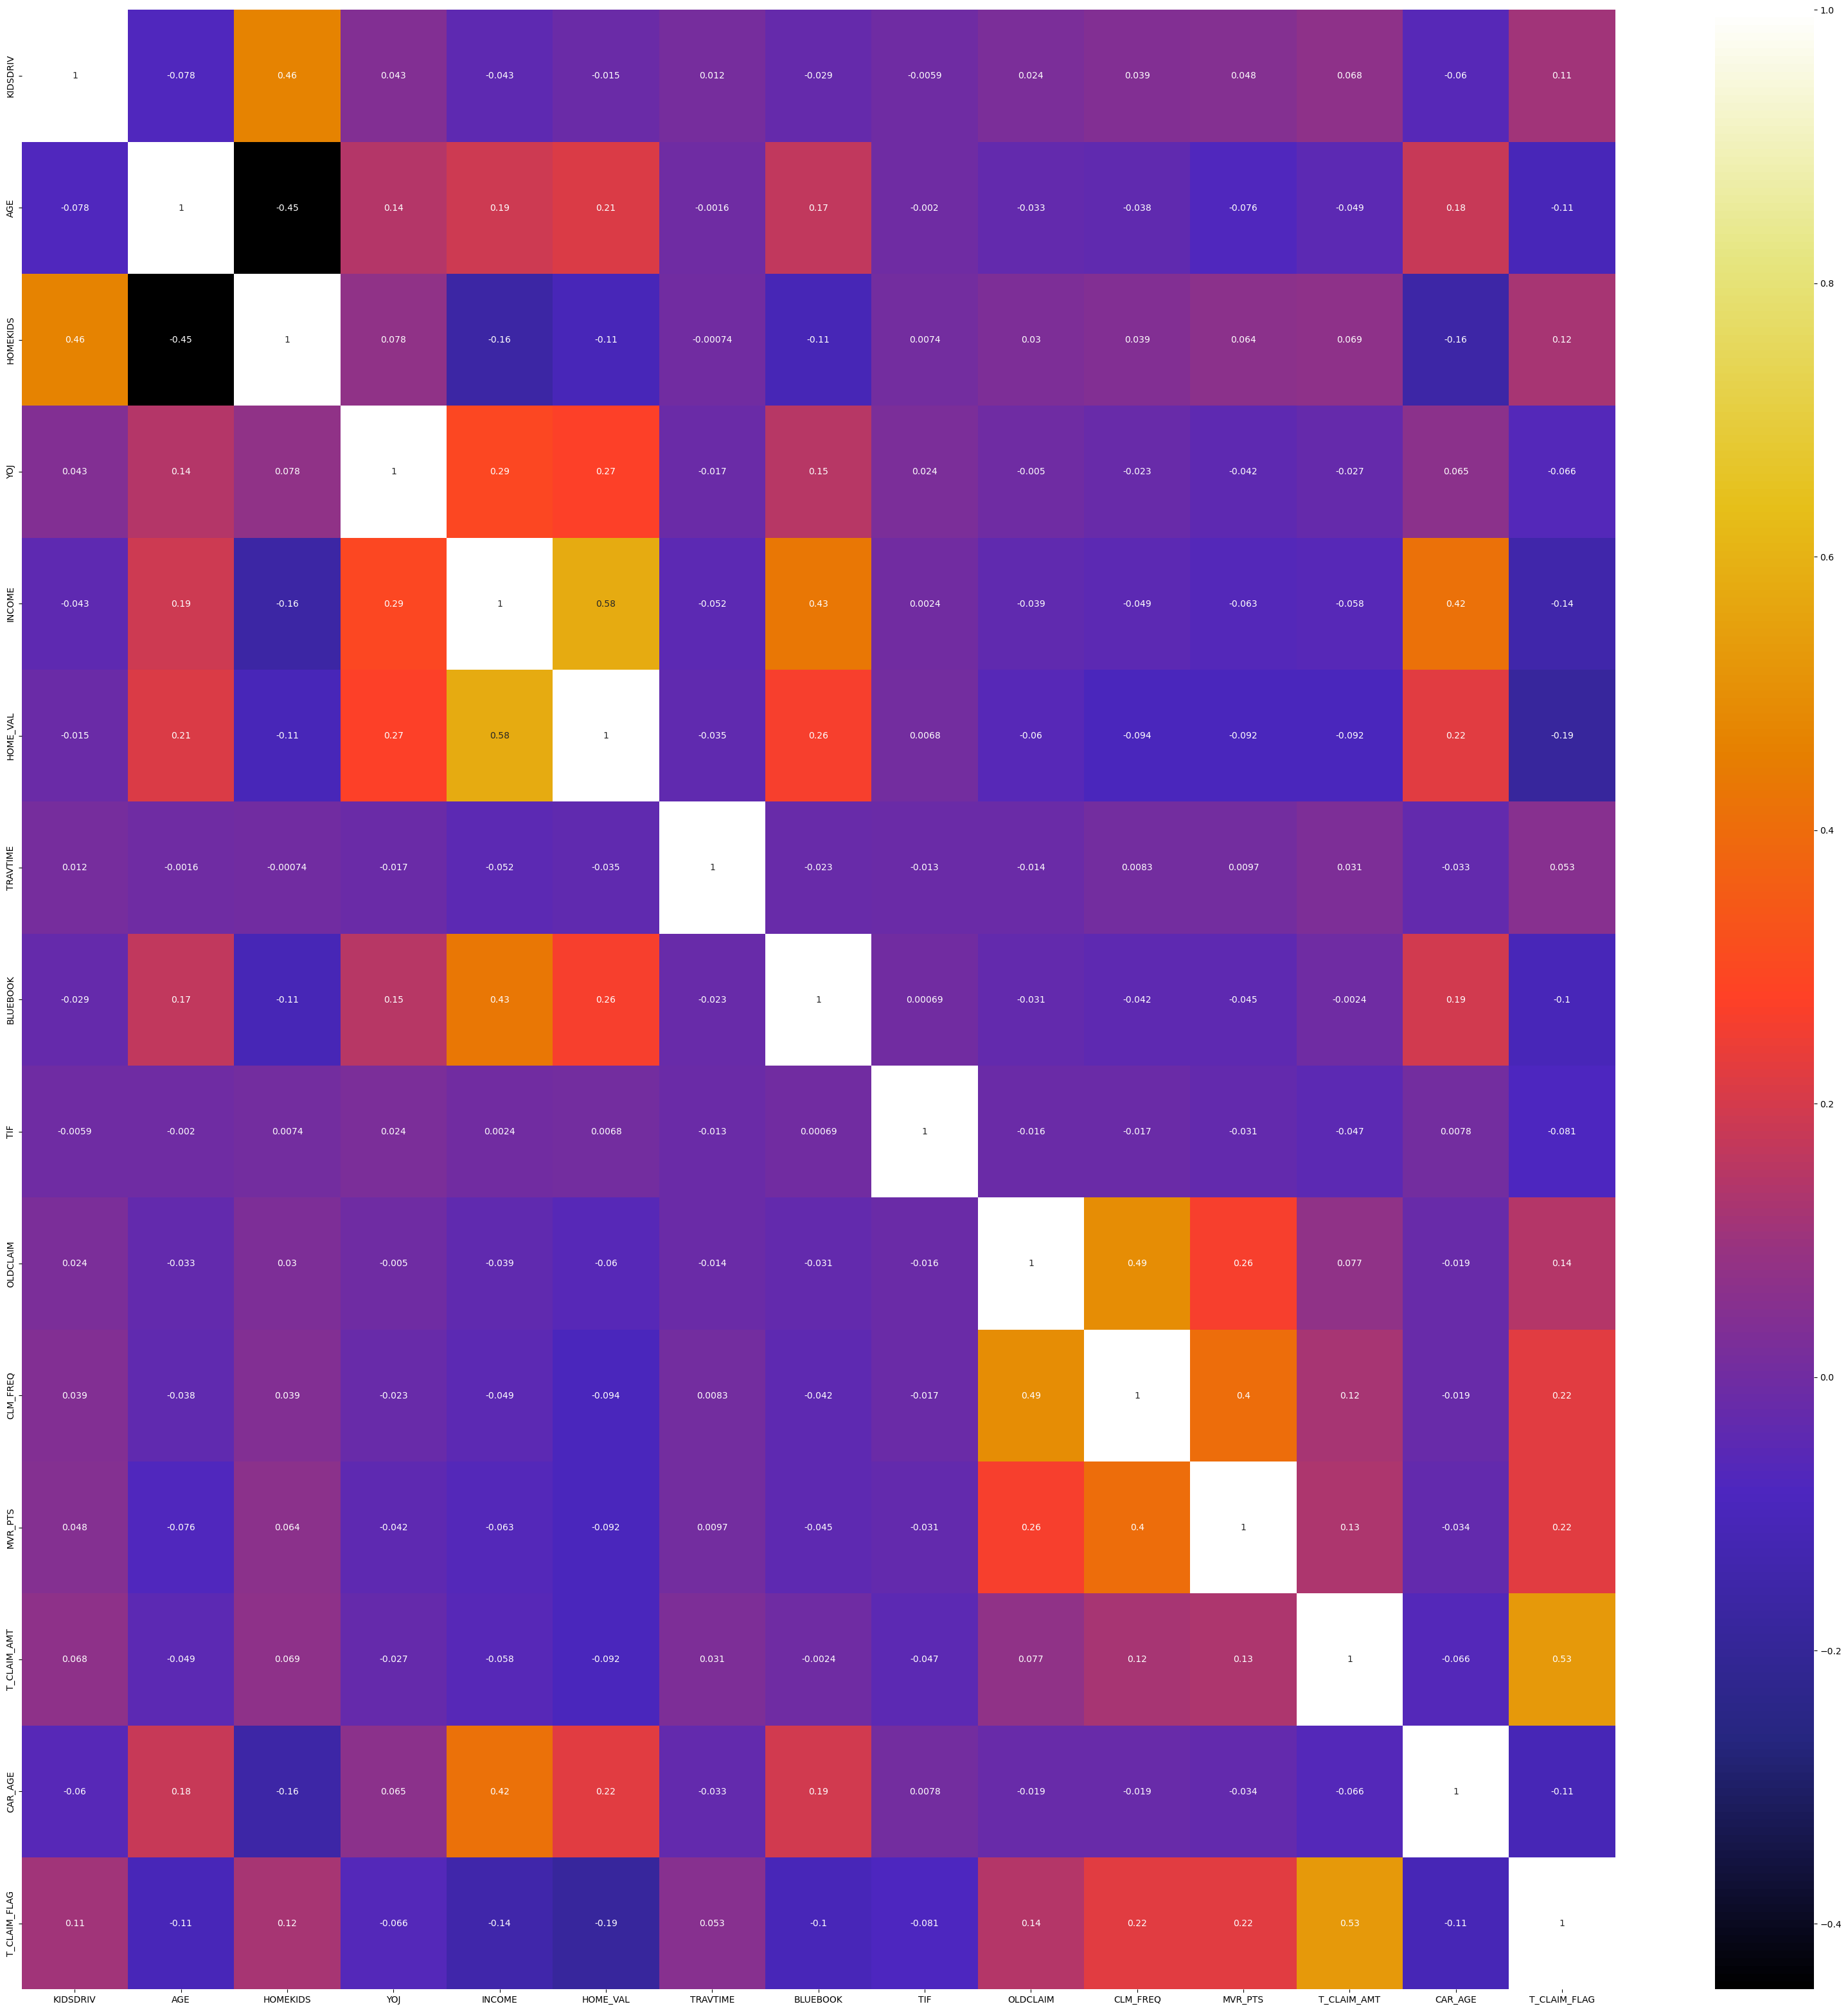

In [662]:
# chekcing the correlation for the data

corr = df_pp.corr()
plt.figure(figsize = (40,40))
sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')

In [663]:
def print_highly_correlated(df, threshold=0.90):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    correlated_features = np.where(np.abs(corr) > threshold) # select ones above the abs threshold
    correlated_features = [(corr.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            cols = df.columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
            
print_highly_correlated(df_pp)

There are no highly correlated features with correlation above 0.9


In [664]:
for col in category_cols:
    print(f"Distinct Values in {col.strip()}\n{df_pp[col].value_counts()}\n")

Distinct Values in PARENT1
No     8958
Yes    1343
Name: PARENT1, dtype: int64

Distinct Values in MSTATUS
Yes    6187
No     4114
Name: MSTATUS, dtype: int64

Distinct Values in GENDER
F    5545
M    4756
Name: GENDER, dtype: int64

Distinct Values in EDUCATION
High School     2952
Bachelors       2822
Masters         2078
<High School    1515
PhD              934
Name: EDUCATION, dtype: int64

Distinct Values in OCCUPATION
Blue Collar     2288
Clerical        1590
Professional    1407
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
nan              665
Doctor           321
Name: OCCUPATION, dtype: int64

Distinct Values in CAR_USE
Private       6512
Commercial    3789
Name: CAR_USE, dtype: int64

Distinct Values in CAR_TYPE
SUV            2883
Minivan        2693
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

Distinct Values in RED_CAR
no     7326
yes    2975
Name: RED_CAR, dtype: int64

In [491]:
s_pp_unique_values = df_pp.nunique()
category_binary_columns = s_pp_unique_values[s_pp_unique_values ==2].index.to_list()
print("Binary Category Columns:",category_binary_columns )
category_binary_columns.remove('T_CLAIM_FLAG')
print("Binary Category Columns:",category_binary_columns )
df_pp.head()

Binary Category Columns: ['PARENT1', 'MSTATUS', 'GENDER', 'CAR_USE', 'RED_CAR', 'REVOKED', 'T_CLAIM_FLAG', 'URBANICITY']
Binary Category Columns: ['PARENT1', 'MSTATUS', 'GENDER', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,T_CLAIM_AMT,CAR_AGE,T_CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban



## 4.1 Encoding the data

Encode the category column - Binary, ordinal, nominal

In [674]:
# encode the category columns
df_encoded = df_pp.copy()

In [675]:
# encode binart column as 0 and 1
yes_no_cols = ['PARENT1', 'MSTATUS', 'RED_CAR', 'REVOKED']
df_encoded[yes_no_cols] = df_encoded[yes_no_cols].replace({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

df_encoded['GENDER'] = df_encoded['GENDER'].replace({'M': 1, 'F': 0})
df_encoded['CAR_USE'] = df_encoded['CAR_USE'].replace({'Private': 1, 'Commercial': 0})
df_encoded['URBANICITY'] = df_encoded['URBANICITY'].replace({'Highly Urban/ Urban': 1, 'Highly Rural/ Rural': 0})
df_encoded.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,T_CLAIM_AMT,CAR_AGE,T_CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,PhD,Professional,14,1,14230.0,11,Minivan,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,High School,Blue Collar,22,0,14940.0,1,Minivan,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,Bachelors,Manager,26,1,21970.0,1,Van,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,High School,Clerical,5,1,4010.0,4,SUV,0,38690.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,NaN,0,306251.0,1,1,<High School,Blue Collar,32,1,15440.0,7,Minivan,1,0.0,0,0,0,0.0,6.0,0,1


In [676]:
# remaining category column to pre-process
list(set(category_cols) - set(category_binary_columns))

['CAR_TYPE', 'OCCUPATION', 'EDUCATION']

In [677]:
# Apply ordinal encoding for EDUCATION
EDUCATION_ordinal_mapping = {'<High School': 0,'High School': 1,'Bachelors': 2,'Masters': 3,'PhD': 4}

# Apply mapping to DataFrame
df_encoded['EDUCATION'] = df_encoded['EDUCATION'].map(EDUCATION_ordinal_mapping)

# Handle the OCCUPATION and CAR_TYPE columns
df_encoded = pd.get_dummies(df_encoded, columns=['OCCUPATION','CAR_TYPE'])
df_encoded.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,T_CLAIM_AMT,CAR_AGE,T_CLAIM_FLAG,URBANICITY,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,OCCUPATION_nan,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,4,14,1,14230.0,11,1,4461.0,2,0,3,0.0,18.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,1,22,0,14940.0,1,1,0.0,0,0,0,0.0,1.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,2,26,1,21970.0,1,1,0.0,0,0,2,0.0,10.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,1,5,1,4010.0,4,0,38690.0,2,0,3,0.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,51.0,0,14.0,NaN,0,306251.0,1,1,0,32,1,15440.0,7,1,0.0,0,0,0,0.0,6.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [678]:
print("\nSummary statistics:")
custom_describe(df_encoded)


Summary statistics:


,count,mean,std,min,1%,10%,20%,50%,90%,99%,max,missing_values,percent_missing
KIDSDRIV,10301.0,0.169304,0.506533,0.0,0.0,0.0,0.0,0.0,1.0,2.00,4.0,0,0.000000
AGE,10294.0,44.837964,8.606671,16.0,25.0,34.0,38.0,45.0,56.0,64.00,81.0,7,0.067955
HOMEKIDS,10301.0,0.720513,1.116355,0.0,0.0,0.0,0.0,0.0,3.0,4.00,5.0,0,0.000000
YOJ,9753.0,10.473700,4.108999,0.0,0.0,5.0,8.0,11.0,15.0,17.00,23.0,548,5.319872
INCOME,9731.0,61568.835680,47458.566563,0.0,0.0,4103.0,21873.0,53526.0,123288.0,214186.30,367030.0,570,5.533443
PARENT1,10301.0,0.130376,0.336733,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.0,0,0.000000
HOME_VAL,9726.0,154513.740284,129191.840215,0.0,0.0,0.0,0.0,160629.0,318046.5,499398.75,885282.0,575,5.581982
MSTATUS,10301.0,0.600621,0.489794,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0,0,0.000000
GENDER,10301.0,0.461703,0.498555,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.0,0,0.000000
EDUCATION,10301.0,1.802349,1.183363,0.0,0.0,0.0,1.0,2.0,3.0,4.00,4.0,0,0.000000


## 4.2. Data split and imputation

In [679]:
null_col_check('df_encoded', df_encoded)

Dataframe: df_encoded
AGE           7
YOJ         548
INCOME      570
HOME_VAL    575
CAR_AGE     639
dtype: int64


In [680]:
from sklearn.model_selection import train_test_split

# X = df_encoded.drop(['T_CLAIM_FLAG','T_CLAIM_AMT'], axis=1)
X = df_encoded
# y = df_encoded['T_CLAIM_AMT']
y = df_encoded['T_CLAIM_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

row_col_count(X_train)
row_col_count(X_test)

number of rows: 8240, column: 38
number of rows: 2061, column: 38


In [683]:
print_df_null_stats("X_train", X_train)

dataframe                          : X_train
Duplicates                         : 0
Total Missing Values               : 1839
Number of rows with missing values : 1680


In [684]:
null_col_check("X_train", X_train)

Dataframe: X_train
AGE           4
YOJ         442
INCOME      450
HOME_VAL    446
CAR_AGE     497
dtype: int64


In [688]:
print_df_null_stats("X_test", X_test)

dataframe                          : X_test
Duplicates                         : 0
Total Missing Values               : 500
Number of rows with missing values : 459


In [687]:
null_col_check("X_test", X_test)

Dataframe: X_test
AGE           3
YOJ         106
INCOME      120
HOME_VAL    129
CAR_AGE     142
dtype: int64


In [689]:
# Step 1: Treat missing values in the training dataset
# For example, using mean imputation
X_train_imputed = X_train.fillna(X_train.mean())

# Step 2: Capture the imputation values used for treatment
# You can store the imputation values in a dictionary
imputation_values = X_train.mean().to_dict()

# Step 3: Apply the same imputation values to the test dataset
X_test_imputed = X_test.fillna(imputation_values)

In [690]:
# no column should have null now
row_col_count(X_train_imputed)

number of rows: 8240, column: 38


In [691]:
print_df_null_stats("X_train_imputed", X_train_imputed)

dataframe                          : X_train_imputed
Duplicates                         : 0
Total Missing Values               : 0
Number of rows with missing values : 0


In [692]:
null_col_check("X_train_imputed", X_train_imputed)

Dataframe: X_train_imputed
Series([], dtype: int64)


In [693]:
# no column should have null now
row_col_count(X_test_imputed)
print_df_null_stats("X_test_imputed", X_test_imputed)
null_col_check("X_test_imputed", X_test_imputed)

number of rows: 2061, column: 38
dataframe                          : X_test_imputed
Duplicates                         : 0
Total Missing Values               : 0
Number of rows with missing values : 0
Dataframe: X_test_imputed
Series([], dtype: int64)


In [694]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df):
    numeric_data = df.select_dtypes(include=['number'])
    # numeric_data.dropna(inplace=True)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]
    print(vif_data)

vif(X_train_imputed)

                    Feature       VIF
0                  KIDSDRIV  1.340677
1                       AGE  1.460353
2                  HOMEKIDS  2.099200
3                       YOJ  1.443964
4                    INCOME  2.754686
5                   PARENT1  1.865649
6                  HOME_VAL  2.189251
7                   MSTATUS  1.995165
8                    GENDER  3.253720
9                 EDUCATION  3.868967
10                 TRAVTIME  1.046299
11                  CAR_USE  2.372190
12                 BLUEBOOK  2.060469
13                      TIF  1.012451
14                  RED_CAR  1.781725
15                 OLDCLAIM  1.684421
16                 CLM_FREQ  1.623402
17                  REVOKED  1.300761
18                  MVR_PTS  1.240525
19              T_CLAIM_AMT  1.406754
20                  CAR_AGE  1.869102
21             T_CLAIM_FLAG  1.705177
22               URBANICITY  1.362809
23   OCCUPATION_Blue Collar       inf
24      OCCUPATION_Clerical       inf
25        OC

/Users/anshuljain/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [695]:
df_pp['OCCUPATION'].value_counts()

Blue Collar     2288
Clerical        1590
Professional    1407
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
nan              665
Doctor           321
Name: OCCUPATION, dtype: int64

In [696]:
df_pp['CAR_TYPE'].value_counts()

SUV            2883
Minivan        2693
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

In [697]:
X_train_imputed.drop(['CAR_TYPE_Pickup','OCCUPATION_nan'], axis=1, inplace=True);
vif(X_train_imputed)

                    Feature        VIF
0                  KIDSDRIV   1.476927
1                       AGE  30.666684
2                  HOMEKIDS   2.869224
3                       YOJ  10.944087
4                    INCOME   7.485908
5                   PARENT1   2.105334
6                  HOME_VAL   5.454892
7                   MSTATUS   4.943513
8                    GENDER   5.754906
9                 EDUCATION  11.850589
10                 TRAVTIME   5.414641
11                  CAR_USE   6.238224
12                 BLUEBOOK   8.861803
13                      TIF   2.670060
14                  RED_CAR   2.485162
15                 OLDCLAIM   2.044407
16                 CLM_FREQ   2.406484
17                  REVOKED   1.485626
18                  MVR_PTS   2.004311
19              T_CLAIM_AMT   1.552221
20                  CAR_AGE   5.998108
21             T_CLAIM_FLAG   2.325589
22               URBANICITY   6.508812
23   OCCUPATION_Blue Collar   5.332132
24      OCCUPATION_Cleric

In [747]:
X_test_imputed.drop(['CAR_TYPE_Pickup','OCCUPATION_nan'], axis=1, inplace=True);

In [698]:
## Checking for 0 variance feature
from sklearn.feature_selection import VarianceThreshold

feature_selector = VarianceThreshold(threshold=0)
feature_selector.fit(X_train_imputed)
[x for x in X_train_imputed.columns if x not in X_train_imputed.columns[feature_selector.get_support()]]

[]

> base data for train and test after encoding and imputing - 


    X_train_imputed, y_train - to be used for train and validate the selected optimised model
    X_test_imputed, y_test - to be used for predicting the test data

In [749]:
X_train_base = X_train_imputed.copy()
X_test_base = X_test_imputed.copy()
y_train_base = y_train.copy()
y_test_base = y_test.copy()
X_train_base.shape, y_train_base.shape, X_test_base.shape, y_test_base.shape

((8240, 36), (6592,), (2061, 36), (2061,))

# 5. Experimating with various Models

In [776]:
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll.base import scope

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

> Splitting the data to perform cross-validation when training and validation of the models.

In [711]:
from sklearn.model_selection import StratifiedKFold

def make_stratified_k_folds(df,tgt_col:str,n_splits):
    # Randomise and reset index for splitting
    df = df.sample(frac=1,random_state=0).reset_index(drop=True)
    n_rows = df.shape[0]
    
    # Calculate k in Sturges Formula
    n_bins = int(np.floor(np.log2(n_rows) + 1))
    
    # Create bins
    df.loc[:,'bins'] = pd.cut(
        df[tgt_col], bins=n_bins, labels=False
    )
    
    skf = StratifiedKFold(n_splits=n_splits)
    for f, (t_, v_) in enumerate(skf.split(X=df, y=df['bins'].values)):
        df.loc[v_, 'kfold'] = f
        
    df = df.drop('bins',axis=1)
    return df

In [712]:
# function to split the data to train and validate the models based on fold
def train_val_split_by_fold(df, fold, tgt):
    X = df.drop(['T_CLAIM_FLAG','T_CLAIM_AMT'], axis=1)
    y = df[tgt]

    X_train = X.loc[X['kfold'] != fold].drop('kfold',axis=1)
    X_valid = X.loc[X['kfold'] == fold].drop('kfold',axis=1)
    y_train = y.loc[X['kfold'] != fold]
    y_valid = y.loc[X['kfold'] == fold]
    return X_train, X_valid, y_train, y_valid

In [713]:
n_folds = 5
df_base_folds = make_stratified_k_folds(X_train_imputed,'T_CLAIM_AMT',n_folds)

/Users/anshuljain/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [736]:
X_train, X_val, y_train, y_val = train_val_split_by_fold(df_base_folds, 0, 'T_CLAIM_FLAG')

In [719]:
classifiers = [
    ('Logistic Regression', LogisticRegression(penalty=None, random_state=42)),
    ('Linear SVM', LinearSVC(random_state=0, tol=1e-5, dual = 'auto')),
    ('K Nearest Neighbors', KNeighborsClassifier(3)),
    ('RBF SVM', SVC(random_state=0, gamma=2, C=1)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0, max_depth=5)),
    ('Random Forest', RandomForestClassifier(random_state=0, max_depth=5, n_estimators=10, max_features=1)),
    ('Neural Net', MLPClassifier(random_state=0, alpha=1, max_iter=1000)),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('Naive Bayes', GaussianNB()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('XGBoost', XGBClassifier(random_state=0)),
    ('GBM Classifier', GradientBoostingClassifier(random_state=0))
]

In [720]:
performance_f1 = []
performance_a = []
for name, clf in classifiers:
    if name == 'Logistic Refression':
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        clf.fit(X_train_scaled, y_train)
        
        y_pred = model.predict(X_val_scaled)
        
    else:
        clf.fit(X_train, y_train)
        X_val_u = X_val

        if name == 'K Nearest Neighbors':
            X_val_u = np.ascontiguousarray(X_val.to_numpy())

        y_pred = clf.predict(X_val_u)
        

    perf_tuple_f1 = (name, f1_score(y_val, y_pred, average='weighted')) 
    perf_tuple_a = (name, accuracy_score(y_val, y_pred))
    
    print(perf_tuple_f1)
    print(perf_tuple_a)
    
    performance_f1.append(perf_tuple_f1)
    performance_a.append(perf_tuple_a)

('Logistic Regression', 0.6330474350746322)
('Logistic Regression', 0.7220873786407767)
('Linear SVM', 0.6882438949532788)
('Linear SVM', 0.7433252427184466)
('K Nearest Neighbors', 0.6671531383277732)
('K Nearest Neighbors', 0.6929611650485437)


/Users/anshuljain/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


('RBF SVM', 0.6015377879979027)
('RBF SVM', 0.7190533980582524)
('Decision Tree', 0.7286466179676593)
('Decision Tree', 0.7524271844660194)
('Random Forest', 0.6107695428730723)
('Random Forest', 0.7220873786407767)
('Neural Net', 0.6390851498580106)
('Neural Net', 0.7263349514563107)
('AdaBoost', 0.7659098950577333)
('AdaBoost', 0.7809466019417476)
('Naive Bayes', 0.6748353907596836)
('Naive Bayes', 0.7190533980582524)
('QDA', 0.7434757926175166)
('QDA', 0.7336165048543689)
('XGBoost', 0.7677891487752184)
('XGBoost', 0.7773058252427184)
('GBM Classifier', 0.7760883550031408)
('GBM Classifier', 0.7930825242718447)


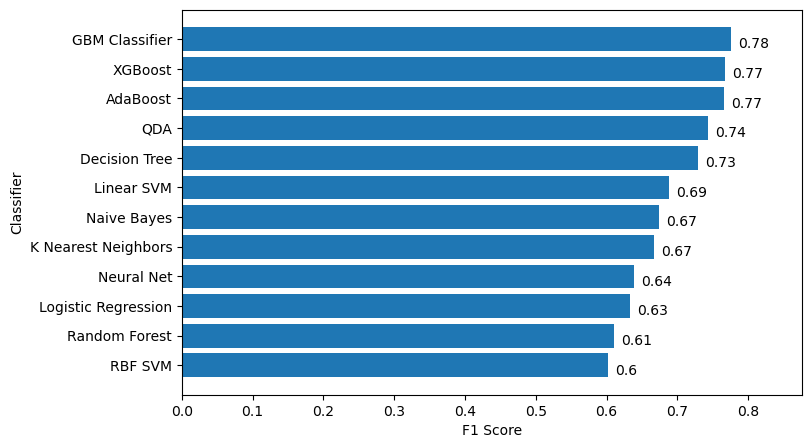

In [721]:
x, y = list(zip(*sorted(performance_f1, key=lambda x: x[1], reverse=False)))
plt.figure(figsize=(8,5))
plt.barh(x,y)
plt.xlim(right=max(y)+0.1)
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
for i in range(len(y)):
    plt.text(y[i]+0.01,i-0.3,round(y[i],2))
plt.show()

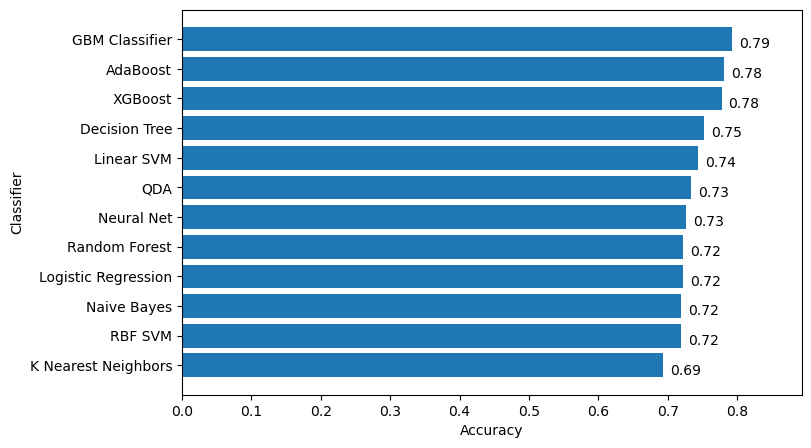

In [738]:
x, y = list(zip(*sorted(performance_a, key=lambda x: x[1], reverse=False)))
plt.figure(figsize=(8,5))
plt.barh(x,y)
plt.xlim(right=max(y)+0.1)
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
for i in range(len(y)):
    plt.text(y[i]+0.01,i-0.3,round(y[i],2))
plt.show()

### Choose the ML technique

for thea above model performance plotting it is clear that ***GradientBoostingClassifier*** and ***XGBoost*** are top 2 choice for test data prediction. Even though ***LogisticRegression*** has faily low performace when compare to prevous, I'll like to see if Hyper parameter tuning improve the model performance

1. logistic Regression
2. GradientBoostingClassifier
3. XGBoost

# 6 Model Fitting

In [513]:
def run_fold(df, fold, tgt, model, isLR):
    X_train, X_val, y_train, y_val = train_val_split_by_fold(df, fold, tgt)
    if isLR:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
    
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
    f1 = f1_score(y_val, y_pred, average='weighted')
    print('F1 score:',f1)
    return f1

In [514]:
def run_folds(df, tgt, model, isLR):
    f1_scores = []
    for fold_ in range(n_folds):
        print('Fold:',fold_ + 1, 'of', n_folds)
        f1_scores.append(run_fold(df, fold_, tgt, model, isLR))
        print('\n -----------------------------------')
    print('Average F1 Score:', np.mean(f1_scores))

## 6.1 Logistic Regression

In [737]:
lgr = LogisticRegression(penalty=None, random_state=42)
run_folds(df_base_folds, 'T_CLAIM_FLAG', lgr, True)

Fold: 1 of 5
F1 score: 0.7573462126132516

 -----------------------------------
Fold: 2 of 5
F1 score: 0.7667304242296327

 -----------------------------------
Fold: 3 of 5
F1 score: 0.7677663556203278

 -----------------------------------
Fold: 4 of 5
F1 score: 0.7791899022769762

 -----------------------------------
Fold: 5 of 5
F1 score: 0.778760543447138

 -----------------------------------
Average F1 Score: 0.7699586876374653


> Applied the model on all folds and there is improvement in score using cross validation

In [739]:
lgr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': None,
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [742]:
# Applying grid search for the hyper parameter tuning
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

param_grid = {'C': np.linspace(10e-6, 10e-2, 500),
              'penalty': ['l2']}

# Perform GridSearchCV - using optimised model from cross validation
grid_search = GridSearchCV(estimator=lgr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_val_scaled, y_val)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'C': 0.016841983967935875, 'penalty': 'l2'}
Accuracy on Test Set: 0.7712378640776699


> there is futher improvement on the accuracy using the gris serach

In [744]:
# Expreiments with other solvers
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve

clf = [
    LogisticRegression(solver='newton-cg',penalty=None,max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty=None,max_iter=1000),
    LogisticRegression(solver='sag',penalty=None,max_iter=1000),
    LogisticRegression(solver='saga',penalty=None,max_iter=1000),
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000),
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000, C=0.016841983967935875),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=0.016841983967935875),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000, C=0.016841983967935875),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000, C=0.016841983967935875),
]

clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:       
    predicted = alg.fit(X_train_scaled, y_train).predict(X_val_scaled)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, "f1"] = round(f1_score(y_val, y_pred, average='weighted'), 5)
    clf_compare.loc[row_index, "Accuracy"] = round(accuracy_score(y_val, y_pred), 5)

    row_index+=1
    
clf_compare.sort_values(by = ['f1'], ascending = False, inplace = True)    
clf_compare

,f1,Accuracy
0,0.61197,0.61772
1,0.61197,0.61772
2,0.61197,0.61772
3,0.61197,0.61772
4,0.61197,0.61772
5,0.61197,0.61772
6,0.61197,0.61772
7,0.61197,0.61772
8,0.61197,0.61772
9,0.61197,0.61772


> There is no improvement using these various Hyper parameter combination, previous used model is giving best performace

## 6.2 GradientBoostingClassifier

In [798]:
gbc = GradientBoostingClassifier(random_state=0)
run_folds(df_base_folds, 'T_CLAIM_FLAG', gbc, False)

Fold: 1 of 5
F1 score: 0.7760883550031408

 -----------------------------------
Fold: 2 of 5
F1 score: 0.7944059210552872

 -----------------------------------
Fold: 3 of 5
F1 score: 0.7687863703681541

 -----------------------------------
Fold: 4 of 5
F1 score: 0.7828017464643218

 -----------------------------------
Fold: 5 of 5
F1 score: 0.7723843806984333

 -----------------------------------
Average F1 Score: 0.7788933547178674


> There is no improvement using cross validation on same model

**Grid serach CV**

In [800]:
# Define parameter grid
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7]}


# Perform GridSearchCV
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gbc.fit(X_train, y_train)

# Get best parameters
best_params_gbc = grid_search_gbc.best_params_
print("Best Hyperparameters:", best_params_gbc)

# Evaluate best model on test set
best_model_gbc = grid_search_gbc.best_estimator_
accuracy_gbc = best_model_gbc.score(X_val, y_val)
print("Accuracy on Validation Set:", accuracy)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy on Validation Set: 0.7712378640776699


> This model performance is better than cross validation but no/marginal change from base model 

In [801]:
best_model_gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

>exploring various other hyper parameter to see if performance increases

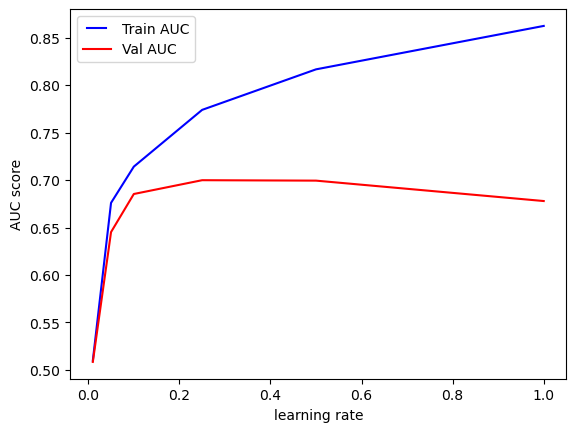

In [760]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

>Optimal Learning rate = 0.1

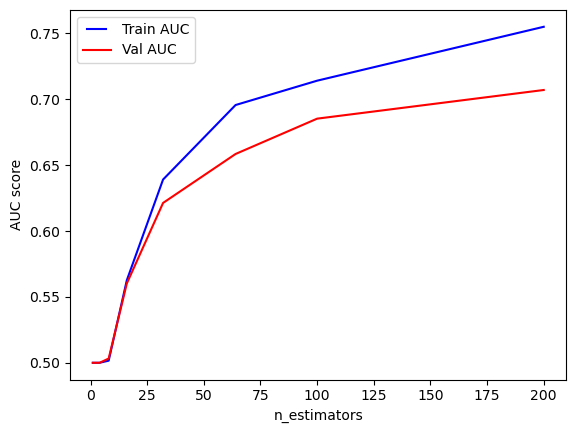

In [600]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for eta in n_estimators:
    model = GradientBoostingClassifier(n_estimators=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

> best n_estimators = 100

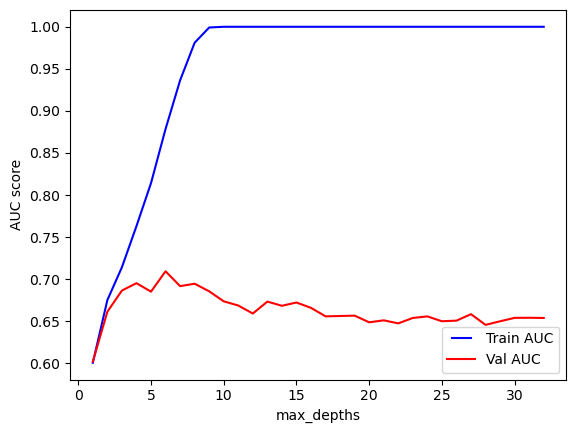

In [761]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for eta in max_depths:
    model = GradientBoostingClassifier(max_depth=int(eta))
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

>best max_depths = 3

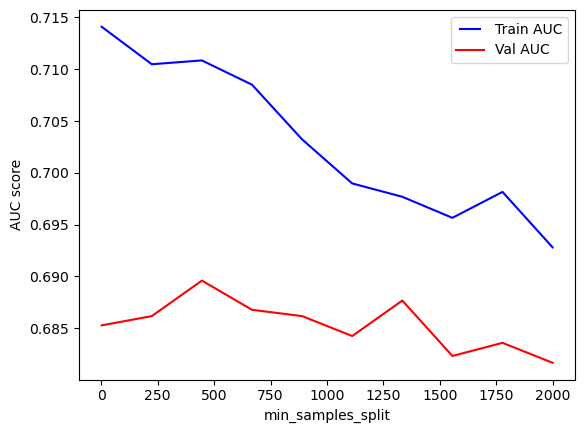

In [763]:
min_samples_splits = np.linspace(2, 2000, 10, endpoint=True)
train_results = []
test_results = []

for eta in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=int(eta))
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

>increasing the sample is not performing good, This is an underfitting case

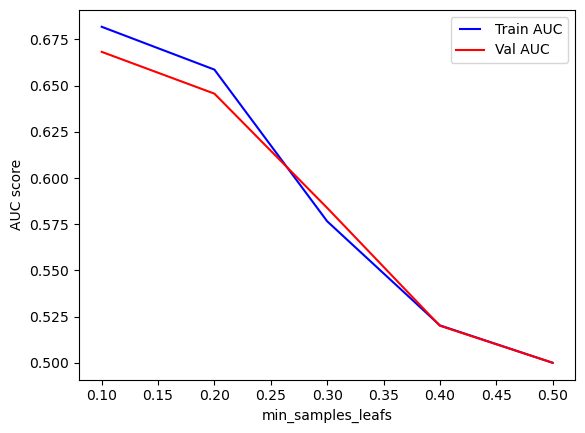

In [764]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for eta in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

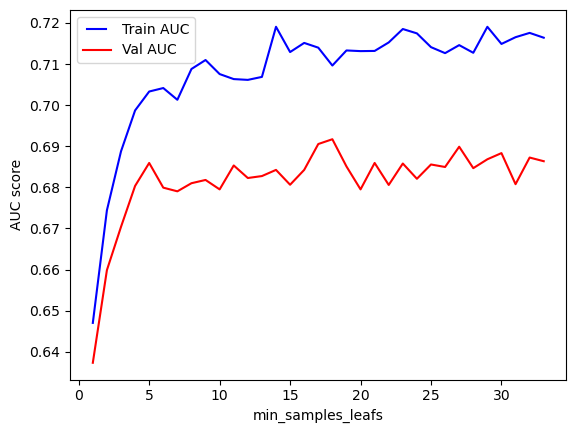

In [616]:
car = list(range(1,X_train.shape[1]))

train_results = []
test_results = []

for eta in max_features:
    model = GradientBoostingClassifier(max_features=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Val AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

> max_features = 5

In [765]:
gb_optimised = GradientBoostingClassifier(learning_rate=.1, max_features=5, max_depth = 3, n_estimators = 100)
gb_optimised.fit(X_train, y_train)
y_pred = gb_optimised.predict(X_val)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print(f"Area under curve: {roc_auc}")
print(f"f1 score        : {f1_score(y_val, y_pred)}")
print(f"accuracy        : {accuracy_score(y_val, y_pred)}")

Area under curve: 0.672372438053057
f1 score        : 0.5208053691275168
accuracy        : 0.783373786407767


> Not much improvement after hyper parameter tuning. Earlier optimised model will be used

## 6.3 XGBClassifier

In [789]:
xgb = XGBClassifier(random_state=0)
run_folds(df_base_folds, 'T_CLAIM_FLAG', xgb, False)

Fold: 1 of 5
F1 score: 0.7677891487752184

 -----------------------------------
Fold: 2 of 5
F1 score: 0.7932313264510298

 -----------------------------------
Fold: 3 of 5
F1 score: 0.7610456669075005

 -----------------------------------
Fold: 4 of 5
F1 score: 0.7688495855493791

 -----------------------------------
Fold: 5 of 5
F1 score: 0.7735174341732461

 -----------------------------------
Average F1 Score: 0.7728866323712749


In [790]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [791]:
space = {
    'learning_rate': hp.uniform ('learning_rate', 0.05,0.5),
    'max_depth': hp.choice('max_depth', np.arange(3, 18, dtype=int)),
    'eval_metric': hp.choice('eval_metric',[None,'error']),
    'gamma': hp.uniform ('gamma', 0,9),
    'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,10),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 50, 1),
    'n_estimators': scope.int(hp.quniform('n_estimators',50,200,5))
}

In [792]:
def objective(params):
    xgb_clf = XGBClassifier(random_state=0, **params)
    f1_scores = []
    for fold_ in range(n_folds):
        X_train, X_valid, y_train, y_valid = train_val_split_by_fold(df_base_folds, fold_, 'T_CLAIM_FLAG')

        evaluation = [(X_train, y_train), (X_valid, y_valid)]
        xgb_clf.fit(X_train, y_train,
                eval_set=evaluation,
                verbose=False)
        y_pred = xgb_clf.predict(X_valid)
        f1_scores.append(f1_score(y_valid, y_pred, average='weighted'))
    
    avg_f1 = np.mean(f1_scores)
#     print ("F1 Score:", avg_f1)
    return {'loss': -avg_f1, 'status': STATUS_OK }

trials = Trials()
best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=100,
                        trials=trials)

100%|██████| 100/100 [01:25<00:00,  1.16trial/s, best loss: -0.7808071872834986]


In [793]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7635598584695632, 'eval_metric': 0, 'gamma': 1.105821408282609, 'learning_rate': 0.40263386484173214, 'max_depth': 14, 'min_child_weight': 49.0, 'n_estimators': 155.0, 'reg_alpha': 6.0, 'reg_lambda': 8.76207117667353}


In [794]:
best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])
best_hyperparams['eval_metric'] = [None,'error'][best_hyperparams['eval_metric']]

# Instantiate the classifier 
xgb_clf_best = XGBClassifier(random_state=0, **best_hyperparams)

run_folds(df_base_folds, 'T_CLAIM_FLAG', xgb_clf_best, False)

Fold: 1 of 5
F1 score: 0.7820577097111219

 -----------------------------------
Fold: 2 of 5
F1 score: 0.7869863970857159

 -----------------------------------
Fold: 3 of 5
F1 score: 0.765089289516771

 -----------------------------------
Fold: 4 of 5
F1 score: 0.7817876681325409

 -----------------------------------
Fold: 5 of 5
F1 score: 0.7881148719713436

 -----------------------------------
Average F1 Score: 0.7808071872834986


> Slight improvement from the base model

## 7 Test data prediction with Optimised Model

In [766]:
X_test1 = X_test_base.drop(['T_CLAIM_FLAG', 'T_CLAIM_AMT'])

## 7.1 Logistic Regression

In [751]:
X_test_scaled = scaler.transform(X_test1)

y_pred = best_model.predict(X_test_scaled)

In [752]:
print("f1 score using Logistic Regression on test data: ", round(f1_score(y_test_base, y_pred, average='weighted'), 5))

f1 score using Logistic Regression on test data:  0.77249


In [754]:
print("accuracy score using Logistic Regression on test data: ", round(accuracy_score(y_test_base, y_pred), 5))

accuracy score using Logistic Regression on test data:  0.7933


> Latest Logistic Regression model with optimised Hyperparameter provided better performance as shown above even though the base model didn't performed well among other so many models

## 7.2 GradientBoostingClassifier

In [803]:
y_pred = best_model_gbc.predict(X_test1)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_base, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print(f"Area under curve: {roc_auc}")
print(f"f1 score        : {f1_score(y_test_base, y_pred, average='weighted')}")
print(f"accuracy        : {accuracy_score(y_test_base, y_pred)}")

Area under curve: 0.6677272384968748
f1 score        : 0.7754520003408204
accuracy        : 0.7962154294032023


In [768]:
print("f1 score using Logistic Regression on test data: ", round(f1_score(y_test_base, y_pred, average='weighted'), 5))

f1 score using Logistic Regression on test data:  0.77545


In [769]:
print("accuracy score using Logistic Regression on test data: ", round(accuracy_score(y_test_base, y_pred), 5))

accuracy score using Logistic Regression on test data:  0.79622


> Latest GradientBoostingClassifier model with optimised Hyperparameter provided slightly better performance as shown above as base model was already performed well

## XGBClassifier

In [795]:
y_pred = xgb_clf_best.predict(X_test1)

In [796]:
print("f1 score using Logistic Regression on test data: ", round(f1_score(y_test_base, y_pred, average='weighted'), 5))

f1 score using Logistic Regression on test data:  0.77574


In [797]:
print("accuracy score using Logistic Regression on test data: ", round(accuracy_score(y_test_base, y_pred), 5))

accuracy score using Logistic Regression on test data:  0.79185


> Latest XGBClassifier model with optimised Hyperparameter provided slightly better performance as shown above as base model was already performed well